## Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

## Import datasets and take a quick glance

In [36]:
df_total = pd.read_csv(r'C:\Users\VT.33\Desktop\COVID19_VN_MOH_MLmodels\predict-LOS(length-of-stay)\assets\processed\df_total.csv', encoding="utf-8")

df_train = pd.read_csv(r'C:\Users\VT.33\Desktop\COVID19_VN_MOH_MLmodels\predict-LOS(length-of-stay)\assets\processed\df_train.csv', encoding="utf-8")

df_test = pd.read_csv(r'C:\Users\VT.33\Desktop\COVID19_VN_MOH_MLmodels\predict-LOS(length-of-stay)\assets\processed\df_test.csv', encoding="utf-8")

In [37]:
df_total.info()
df_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PATIENT_NO          163 non-null    int64  
 1   AGE                 163 non-null    float64
 2   SEX                 163 non-null    int64  
 3   ORIGIN_EUROPE       163 non-null    int64  
 4   ORIGIN_CHINA        163 non-null    int64  
 5   ORIGIN_US           163 non-null    int64  
 6   ORIGIN_DOMESTIC     163 non-null    int64  
 7   DAYS_OF_ONSET       163 non-null    int64  
 8   ONSET_FEVER         163 non-null    int64  
 9   ONSET_COUGH         163 non-null    int64  
 10  ONSET_TIRED         163 non-null    int64  
 11  ONSET_THROAT        163 non-null    int64  
 12  ONSET_RES           163 non-null    int64  
 13  BACKGROUND_DISEASE  163 non-null    int64  
 14  HOSPITAL            163 non-null    int64  
 15  LOS                 16 non-null     float64
dtypes: float

,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_THROAT,ONSET_RES,BACKGROUND_DISEASE,HOSPITAL,LOS
0,1,66.0,1,0,1,0,0,6,0,0,0,0,0,2,1,20.0
1,2,28.0,1,0,1,0,0,3,0,0,0,0,0,0,1,12.0
2,3,25.0,0,0,1,0,0,7,0,0,0,0,0,0,0,4.0
3,4,29.0,1,0,1,0,0,9,0,0,0,0,0,0,0,19.0
4,5,23.0,0,0,1,0,0,5,0,0,0,0,0,0,0,11.0


In [17]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 16 non-null     float64
 1   SEX                 16 non-null     int64  
 2   ORIGIN_EUROPE       16 non-null     int64  
 3   ORIGIN_CHINA        16 non-null     int64  
 4   ORIGIN_US           16 non-null     int64  
 5   ORIGIN_DOMESTIC     16 non-null     int64  
 6   DAYS_OF_ONSET       16 non-null     int64  
 7   ONSET_FEVER         16 non-null     int64  
 8   ONSET_COUGH         16 non-null     int64  
 9   ONSET_TIRED         16 non-null     int64  
 10  ONSET_THROAT        16 non-null     int64  
 11  ONSET_RES           16 non-null     int64  
 12  BACKGROUND_DISEASE  16 non-null     int64  
 13  HOSPITAL            16 non-null     int64  
 14  LOS                 16 non-null     int64  
dtypes: float64(1), int64(14)
memory usage: 2.0 KB


,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_THROAT,ONSET_RES,BACKGROUND_DISEASE,HOSPITAL,LOS
0,66.0,1,0,1,0,0,6,0,0,0,0,0,2,1,20
1,28.0,1,0,1,0,0,3,0,0,0,0,0,0,1,12
2,25.0,0,0,1,0,0,7,0,0,0,0,0,0,0,4
3,29.0,1,0,1,0,0,9,0,0,0,0,0,0,0,19
4,23.0,0,0,1,0,0,5,0,0,0,0,0,0,0,11


In [38]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PATIENT_NO          147 non-null    int64  
 1   AGE                 147 non-null    int64  
 2   SEX                 147 non-null    int64  
 3   ORIGIN_EUROPE       147 non-null    int64  
 4   ORIGIN_CHINA        147 non-null    int64  
 5   ORIGIN_US           147 non-null    int64  
 6   ORIGIN_DOMESTIC     147 non-null    int64  
 7   DAYS_OF_ONSET       147 non-null    int64  
 8   ONSET_FEVER         147 non-null    int64  
 9   ONSET_COUGH         147 non-null    int64  
 10  ONSET_TIRED         147 non-null    int64  
 11  ONSET_THROAT        147 non-null    int64  
 12  ONSET_RES           147 non-null    int64  
 13  BACKGROUND_DISEASE  147 non-null    int64  
 14  HOSPITAL            147 non-null    int64  
 15  LOS                 0 non-null      float64
dtypes: float

,PATIENT_NO,AGE,SEX,ORIGIN_EUROPE,ORIGIN_CHINA,ORIGIN_US,ORIGIN_DOMESTIC,DAYS_OF_ONSET,ONSET_FEVER,ONSET_COUGH,ONSET_TIRED,ONSET_THROAT,ONSET_RES,BACKGROUND_DISEASE,HOSPITAL,LOS
0,17,26,0,1,0,0,0,5,1,1,1,0,0,0,0,NaN
1,18,27,1,0,0,0,0,7,0,1,0,1,0,0,0,NaN
2,19,27,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN
3,20,64,1,0,0,0,1,0,0,0,0,0,0,1,0,NaN
4,21,61,1,1,0,0,0,2,0,1,1,0,0,0,0,NaN


## Start importing and analysing the basics of possible models

In [76]:
# target variable (LOS)
LOS = df_train['LOS'].values

# extract patient no to build a new dataset for comparision between models
PATIENT_NO_test = df_test['PATIENT_NO']

In [98]:
# split train set and test set (without y_test)
X_train = df_train.drop(columns = ['LOS', 'PATIENT_NO'])

y_train = LOS

X_test = df_test.drop(columns = ['LOS', 'PATIENT_NO'])

In [143]:
# models for comparision
models = [SGDRegressor(random_state = 0),
         GradientBoostingRegressor(random_state = 0),
         LinearRegression(),
         KNeighborsRegressor(),
         RandomForestRegressor(random_state = 0)]

results = [PATIENT_NO_test]

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    results.append(y_test_preds)
    
    # Grab model name and store results associated with model
    # impossible to calculate r2 score dude to lack of y_test
    name = str(model).split("(")[0]
    print('{} finished.'.format(name))

SGDRegressor finished.
GradientBoostingRegressor finished.
LinearRegression finished.
KNeighborsRegressor finished.
RandomForestRegressor finished.


In [144]:
# create dataset of all regression results for comparision
df_results = pd.DataFrame(np.transpose(results))

df_results = df_results.rename(columns={0 : "PATIENT_NO", 
                                        1 : "LOS_SGDRegressor", 
                                        2 : "LOS_GBRegressor", 
                                        3 : "LOS_LinearRegression",
                                        4 : "LOS_KNeighborsRegressor",
                                        5 : "LOS_RandomForestRegressor"})

df_results

,PATIENT_NO,LOS_SGDRegressor,LOS_GBRegressor,LOS_LinearRegression,LOS_KNeighborsRegressor,LOS_RandomForestRegressor
0,17.0,9.190136e+11,6.664815,9.679460,10.6,9.48
1,18.0,1.116721e+12,13.784658,11.553000,10.6,9.20
2,19.0,5.151279e+11,11.396824,12.188395,9.4,12.44
3,20.0,1.250363e+12,16.235105,19.580457,14.6,13.78
4,21.0,1.373842e+12,13.898362,13.947172,14.6,12.28
...,...,...,...,...,...,...
142,159.0,6.503291e+11,8.689788,18.879618,10.4,13.01
143,160.0,1.160105e+12,4.857728,9.129173,9.6,8.40
144,161.0,1.707193e+12,12.896299,13.600342,14.6,13.62
145,162.0,1.218642e+12,12.923857,13.021675,14.6,13.59


In [145]:
df_results.describe()

,PATIENT_NO,LOS_SGDRegressor,LOS_GBRegressor,LOS_LinearRegression,LOS_KNeighborsRegressor,LOS_RandomForestRegressor
count,147.000000,1.470000e+02,147.000000,147.000000,147.000000,147.000000
mean,90.000000,7.678048e+11,12.181210,12.922521,11.035374,11.796190
std,42.579338,3.567201e+11,2.966490,1.693314,2.049751,1.023764
min,17.000000,2.657682e+10,4.857728,9.007001,8.000000,8.230000
25%,53.500000,4.726218e+11,10.979271,11.610213,9.600000,11.230000
50%,90.000000,7.028261e+11,13.411159,12.908188,10.400000,11.800000
75%,126.500000,1.026981e+12,14.595733,13.969456,11.800000,12.355000
max,163.000000,1.772855e+12,17.332280,19.580457,14.600000,13.970000


In [146]:
# remove SGD Regressor due to unusable result
df_usable_results = df_results.drop(columns = ['LOS_SGDRegressor'])

df_usable_results

,PATIENT_NO,LOS_GBRegressor,LOS_LinearRegression,LOS_KNeighborsRegressor,LOS_RandomForestRegressor
0,17.0,6.664815,9.679460,10.6,9.48
1,18.0,13.784658,11.553000,10.6,9.20
2,19.0,11.396824,12.188395,9.4,12.44
3,20.0,16.235105,19.580457,14.6,13.78
4,21.0,13.898362,13.947172,14.6,12.28
...,...,...,...,...,...
142,159.0,8.689788,18.879618,10.4,13.01
143,160.0,4.857728,9.129173,9.6,8.40
144,161.0,12.896299,13.600342,14.6,13.62
145,162.0,12.923857,13.021675,14.6,13.59


## Parameter tuning and feature importance of Gradient Boosting Regressor

In [147]:
# possible parameters for tuning
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [148]:
# set the parameters by cross-validation
tuned_parameters_GBR = [{'n_estimators': [100, 200, 300],
                     'max_depth' : [3, 4],
                     'loss': ['ls', 'lad', 'huber']}]

# create and fit a ridge regression model, testing each alpha
reg_model_GBR = GradientBoostingRegressor()
grid_GBR = GridSearchCV(reg_model_GBR, tuned_parameters_GBR)
grid_GBR.fit(X_train, y_train)
reg_model_GBR_optimized = grid_GBR.best_estimator_

# summarize the results of the grid search
print(grid_GBR.best_score_)
print(grid_GBR.best_estimator_)

-2.4333850606679306
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [117]:
# obtain new prediction results and replace into the result dataset
y_test_preds_GBR = reg_model_GBR_optimized.predict(X_test)

df_usable_results['LOS_GBRegressor'] = y_test_preds_GBR

In [120]:
# calculate feature importance
feature_imp_GBR = pd.DataFrame(reg_model_GBR_optimized.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Feature importance (GB Regressor)']).sort_values('Feature importance (GB Regressor)', ascending=False)

feature_imp_GBR

,Feature importance (GB Regressor)
AGE,0.447882
DAYS_OF_ONSET,0.236247
SEX,0.109273
HOSPITAL,0.096173
BACKGROUND_DISEASE,0.049721
ORIGIN_CHINA,0.024597
ORIGIN_DOMESTIC,0.023930
ORIGIN_US,0.012177
ORIGIN_EUROPE,0.000000
ONSET_FEVER,0.000000


## Parameter tuning and feature importance of Random Forest Regressor

In [124]:
# set the parameters by cross-validation
tuned_parameters_RFR = [{
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_RFR = RandomForestRegressor()
grid_RFR = GridSearchCV(reg_model_RFR, tuned_parameters_RFR)
grid_RFR.fit(X_train, y_train)
reg_model_RFR_optimized = grid_RFR.best_estimator_

# summarize the results of the grid search
print(grid_RFR.best_score_)
print(grid_RFR.best_estimator_)

-0.6578209097186747
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [125]:
y_test_preds_RFR = reg_model_GBR_optimized.predict(X_test)

df_usable_results['LOS_RandomForestRegressor'] = y_test_preds_RFR

In [126]:
feature_imp_RFR = pd.DataFrame(reg_model_RFR_optimized.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Feature importance (RF Regressor)']).sort_values('Feature importance (RF Regressor)', ascending=False)

feature_imp_RFR

,Feature importance (RF Regressor)
DAYS_OF_ONSET,0.285714
ORIGIN_CHINA,0.257143
AGE,0.171429
ORIGIN_DOMESTIC,0.171429
SEX,0.114286
ORIGIN_EUROPE,0.000000
ORIGIN_US,0.000000
ONSET_FEVER,0.000000
ONSET_COUGH,0.000000
ONSET_TIRED,0.000000


## Parameter tuning for K Neighbors Regressor

In [127]:
KNeighborsRegressor().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [139]:
tuned_parameters_KNR = [{
    'n_neighbors' : [4]
}]

# create and fit a ridge regression model, testing each alpha
reg_model_KNR = KNeighborsRegressor()
grid_KNR = GridSearchCV(reg_model_KNR, tuned_parameters_KNR)
grid_KNR.fit(X_train, y_train)
reg_model_KNR_optimized = grid_KNR.best_estimator_

# summarize the results of the grid search
print(grid_KNR.best_score_)
print(grid_KNR.best_estimator_)

-3.0398748629252097
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')


In [140]:
y_test_preds_KNR = reg_model_KNR_optimized.predict(X_test)

df_usable_results['LOS_KNeighborsRegressor'] = y_test_preds_KNR

## Extract final results

In [142]:
df_usable_results

,PATIENT_NO,LOS_GBRegressor,LOS_LinearRegression,LOS_KNeighborsRegressor,RandomForestRegressor,LOS_RandomForestRegressor
0,17.0,5.846011,9.679460,8.50,9.48,5.846011
1,18.0,14.361036,11.553000,10.50,9.20,14.361036
2,19.0,10.547236,12.188395,10.00,12.44,10.547236
3,20.0,13.044400,19.580457,14.75,13.78,13.044400
4,21.0,11.999264,13.947172,13.75,12.28,11.999264
...,...,...,...,...,...,...
142,159.0,13.855537,18.879618,9.00,13.01,13.855537
143,160.0,7.201008,9.129173,10.50,8.40,7.201008
144,161.0,11.789176,13.600342,14.75,13.62,11.789176
145,162.0,11.789667,13.021675,14.75,13.59,11.789667


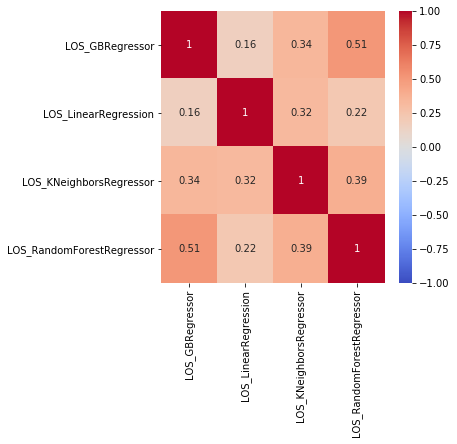

In [151]:

corr_matrix = df_usable_results.drop(columns = ['PATIENT_NO']).corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix,
            vmin=-1,
            cmap='coolwarm',
            annot=True);